# Versuch 1: Statistik I: W√ºrfel-Simulation

In [69]:
#Name: Finn Jannik Wagner
#Matrikelnummer: 8102237
#E-Mail-Adresse: finn.jannik.wagner@physik.uni-giessen.de
#Studiengang: Physik
#Wiederholen Sie das Praktikum (Ja/Nein)? Nein

Die folgenden Aufgaben basieren auf der Generierung von (Pseudo-)Zufallszahlen am Computer. Daher liefert ein mehrfaches Ausf√ºhren der Versuche unterschiedliche Werte. F√ºhren Sie den Code jeder einzelnen Aufgabe daher mindestens dreimal aus und dokumentieren Sie die Ergebnisse. Nutzen Sie dann (wie auch bei Experimenten im Labor) den Mittelwert und die Standardabweichung, wenn Sie die Fragen in Ihrem Protokoll beantworten.

##### Aufgabenstellung: 
F√ºr die folgenden Aufgaben werden die Ergebnisse von W√ºrfelw√ºrfen untersucht. <br><br>
a) Berechnen Sie zun√§chst (auf Papier) den Erwartungswert, sowie die Standardabweichung eines 6-seitigen W√ºrfels, f√ºr die Augensumme von i) zwei iii) f√ºnf und iv) zehn W√ºrfeln.  <br><br>
b) Berechnen Sie zun√§chst den Erwartungswert, sowie die Standardabweichung eines 20-seitigen W√ºrfels, f√ºr i) die Augenzahl eines W√ºrfels, sowie f√ºr die Augensumme von ii) zwei iii) f√ºnf und iv) zehn W√ºrfeln.  <br><br>
c) Simulieren Sie mit Hilfe der Funktion dice(n, m = 1, k = 20, save = "example") ein Zufallsexperiment. Dabei soll ein 20-seitiger W√ºrfel i) $n = 100$ mal, ii) $n = 1000$ und iii) $n = 10000$ mal geworfen werden. Vergleichen Sie jeweils den Mittelwert und die empirische Standardabweichung mit dem Erwartungswert und der Standardabweichung aus Teil b). Anmerkung: "example" ist ein Platzhalter f√ºr den Namen der PDF-Datei, welche abgespeichert wird. Verwenden Sie unterschiedliche Namen, sonst wird die Datei √ºberschrieben.<br><br>
d) Simulieren Sie mit Hilfe der Funktion dice(n=1000, m, k=20, save = "example") ein Zufallsexperiment. Dabei sollen i) zwei, ii) f√ºnf und iii) zehn 20-seitige W√ºrfel je 1000 mal geworfen werden. Vergleichen Sie jeweils den Mittelwert und die empirische Standardabweichung mit dem Erwartungswert und der Standardabweichung aus Teil a). <br><br>
e) Interpretieren Sie Ihre Ergebnisse. Entsprechen Sie Ihren Erwartungen?  <br><br>
f) F√ºhren Sie mit den Werten aus d) mit Hilfe der Funktion chi_search(x = points, sigma, mu, save = "example") einen Fit durch. Dabei wird eine Gau√üfunktion als theoretische Funktion verwendet. Vergleichen sie die $\chi ^2$ Werte. Welcher Wert ist besonders hoch/gering und woran k√∂nnte das liegen? <br><br>
g) Wie hoch ist die Wahrscheinlichkeit, dass beim 10-maligen Werfen eines 20-seitigen W√ºrfels i) mindestens einmal die 20 f√§llt? ii) h√∂chstens 2 mal die 1 f√§llt? iii) genau 3 mal die 5 f√§llt? iv) genau 3 mal die 5 UND h√∂chstens 2 mal die 1 (Tipp: Baumdiagramm kann helfen)


##### Bemerkung: 
Sie k√∂nnen gerne auch mit anderen Werten herumspielen, um ein besseres Gef√ºhl f√ºr die Zusammenh√§nge zu bekommen. Verwenden Sie in diesem Fall die entsprechende Funktion ohne das save-Argument, also dice(n, m, k) anstatt dice(n, m, k, save). F√ºr die Auswertung sind der Werte aus der Aufgabenstellung relevant.

In [70]:
import numpy as np
from numpy import random as rnd
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
import math

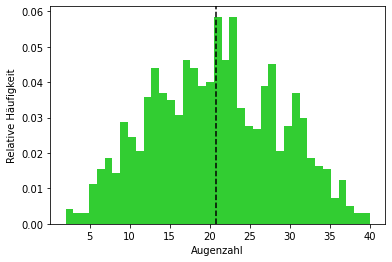

Arithmetisches Mittel:  20.733 
Empirische Standardabweichung:  8.184235517139033
without plot
(array([0.004, 0.003, 0.003, 0.011, 0.015, 0.018, 0.014, 0.028, 0.024,
       0.02 , 0.035, 0.043, 0.036, 0.034, 0.03 , 0.045, 0.043, 0.038,
       0.039, 0.057, 0.045, 0.057, 0.032, 0.027, 0.026, 0.038, 0.044,
       0.02 , 0.027, 0.036, 0.029, 0.018, 0.016, 0.015, 0.007, 0.012,
       0.005, 0.003, 0.003]), array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41]), <BarContainer object of 39 artists>)
[ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40]


0.07746979828438033

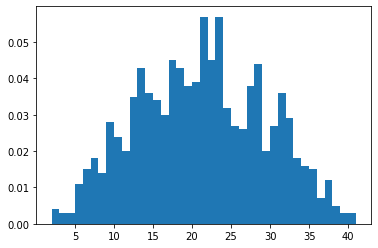

In [89]:
def dice (n, m, k, save = False):                                       
    
    """
    dice(n, m, k, save) 
    n = Anzahl der W√ºrfelw√ºrfe (Integer), 
    m = Anzahl der W√ºrfel (Integer), 
    k = Anzahl der W√ºrfelseiten (Integer) 
    save = Name des PDFs (String)
    
    Funktion plottet Histogramm eines simulierten W√ºrfelexperiments, inklusive Markierung f√ºr den Mittelwert
    und gibt den Array, den Mittelwert und die Standardabweichung der 
    Augensummen aus. Zumdem wird ein PDF erstellt, falls save √ºbergeben wird
    """
    m1 = m
    k1 = k
    dice_matrix=np.array([])                                            #leeres Array zum Auff√ºllen
    for i in range (n):
        dice_row=np.array([])
        for j in range (m):
            dice_row=np.append(dice_row,[rnd.randint(1,k+1)])           #m-er Reihe wird erzeugt. Gef√ºllt durch Randoms
        dice_matrix= np.append(dice_matrix,[dice_row])                  #n-te m-er Reihe wird dem Array hinzugef√ºgt
    dice_sum = sum(dice_matrix.reshape(n,m).transpose())                #Summe der Augenzahlen
    plt.hist(dice_sum, bins = (k-1)*m+1, 
             range = (m, m*k), color = 'limegreen' , density = True)    #Histogram mit relativen H√§ufigkeit
    plt.axvline(np.mean(dice_sum),color='black' ,linestyle='--')        #vertikale Linie des Mittelwertes
    plt.xlabel("Augenzahl")                                             #Bezeichnung x-Achse
    plt.ylabel("Relative H√§ufigkeit")                                   #Bezeichnung y-Achse
    if (save != False):                                                 #wenn save ein String s ist, wird ein PDF mit dem Namen s gespeichert
        plt.title(save)
        plt.savefig(save+'.pdf')
    plt.show()                                                          #Plot
    print ("Arithmetisches Mittel: ", np.mean(dice_sum), "\nEmpirische Standardabweichung: ", np.std(dice_sum) )              
    return (dice_sum, np.mean(dice_sum), np.std(dice_sum), k1, m1 )             #Array, Mittelwert und Standardabweichung der Augensummen


def gauss(sigma, mu, x): # Setzt in die Gaussfunktion ein.
    a = 1/(sigma * np.sqrt(2*np.pi)) * np.exp(-0.5* (x - mu)**2 /sigma**2)
    return a   

def chi_squared(y, sigma, mu, save = False):
    x = y[0]
    k = y[3]
    m = y[4]
    A = plt.hist(x, bins = np.arange(m,m*k+2), density = True)
    a= sum((((gauss(sigma, mu, A[1][:-1]) - A[0]) **2) /gauss(sigma, mu, A[1][:-1])))
    plt.plot(np.linspace(0, m*k+2, 1000), gauss(sigma, mu, np.linspace(0, m*k+2, 1000)), 'r')
    plt.xlabel("Augenzahl")
    plt.ylabel("Relative H√§ufigkeit")
    if (save != False):
        plt.title(save)
        plt.savefig(save+'.pdf')
    plt.show()
    print("chi-Quadrat:", a )
    pass

def chi_squared_without_plot(y, sigma, mu, save = False):
    x = y[0]
    k = y[3]
    m = y[4]
    A = plt.hist(x, bins = np.arange(m,m*k+2), density = True)
    print(A)
    print(A[1][:-1])
    a = sum( ( (( gauss(sigma, mu, A[1][:-1]) - A[0] ) **2) / gauss(sigma, mu, A[1][:-1])) )
    return a

v = dice(n=1000, m=2, k=20)
print('without plot')
chi_squared_without_plot(v, v[2], v[1])

# Aufgabe 1a)
Erwartungswerte von 6-seitigen W√ºrfeln
## 1 W√ºrfel:
Alle 6 Werte des W√ºrfels sind gleich wahrscheinlich mit der Wahrscheinlichkeit 1/6. <br>
Der Erwartungswert $¬µ$ ist damit $1*1/6 + 2 * 1/6 + 3*1/6 + 4*1/6 + 5*1/6 + 6*1/6 = ¬µ = 3.5$ <br>
Die Standardabweichung ist $math.sqrt(1/6*(3.5 - 1)**2 + 1/6*(3.5 - 2)**2 + 1/6*(3.5 - 3)**2 + 1/6*(3.5 - 4)**2 + 1/6*(3.5 - 5)**2 + 1/6*(3.5 - 6)**2) = math.sqrt(17.5/6) ‚âà 1.71$
    
## 2 W√ºrfel:
Da einzelne W√ºrfelw√ºrfe unabh√§ngig von einander sind und f√ºr den Erwartungswert Linearit√§t gilt, ist der Erwartungswert f√ºr $n$ W√ºrfel $n*3.5$ <br>
In diesem Fall also $¬µ = 2*3.5 = 7$
    
Die Standardabweichung ist: <br>
$math.sqrt( 1/36*(7 - 2)**2 + 2/36*(7 - 3)**2 + 3/36*(7 - 4)**2 + 4/36*(7 - 5)**2 + 5/36*(7 - 6)**2 + 6/36*(7 - 7)**2 + 5/36*(7 - 8)**2 + 4/36*(7 - 9)**2 + 3/36*(7 - 10)**2 + 2/36*(7 - 11)**2 + 1/36*(7 - 12)**2) = math.sqrt(35/6) = math.sqrt(2 * 17.5/6) ‚âà 2.42$ <br>
F√ºr die Varianz gilt bei unabh√§ngigen W√ºrfelw√ºrfen ebenfalls Linearit√§t, diese l√§sst sich da die Wurzelfunktion monoton ist auch auf die Standardabweichung √ºbertragen. <br>
Die Standardabweichung f√ºr zwei W√ºrfel ist die eines W√ºrfels mal den Faktor $math.sqrt(2)$.
    
## 5 W√ºrfel:
Erwartungswert ¬µ = 5*3.5 = 17.5 <br>
Standardabweichung œÉ = math.sqrt(5 * 17.5/6) ‚âà 3.82
    
## 10 W√ºrfel:
Erwartungswert ¬µ = 10*3.5 = 35 <br>
Standardabweichung œÉ = math.sqrt(10 * 17.5/6) ‚âà 5.4

# Aufgabe 1b)

Wir nehmen an das sich bei dem W√ºrfel um einen Ikosaeder handelt, alle Seiten also die gleiche Wahrscheinlichkeit 1/20 haben.

## 1 W√ºrfel:
Der Erwartungswert ist damit $¬µ = 1*1/20 + 2*1/20 + 3*1/20 + ... = 1/20 * (1+2+3+...) = (20+1)/2 * 20 * 1/20 = 21/2 = 10.5$ <br>
Die Standardabweichung ist $œÉ = math.sqrt(1/20 * sum([(10.5 - i)**2 $for i in range$(1, 20+1)])) = math.sqrt(133/4) ‚âà 5.77$ <br>

√Ñquivalent zu einem 6 seitigen W√ºrfel lassen sich Erwartungswert und Standardabweichung f√ºr mehrere W√ºrfe auf Grund von Monotonie einfach bestimmen.

## 2 W√ºrfel:
Erwartungswert $¬µ = 2*10.5 = 21$ <br>
Standardabweichung $œÉ = math.sqrt(2 * 133/4) ‚âà 8.15$
    
## 5 W√ºrfel:
Erwarungswert $¬µ = 5*10.5 = 52.5$ <br>
Standardabweichung $œÉ = math.sqrt(5 * 133/4) ‚âà 12.89$

## 10 W√ºrfel:
Erwarungswert $¬µ = 10*10.5 = 105$ <br>
Standardabweichung $œÉ = math.sqrt(10 * 133/4) ‚âà 18.23$

In [ ]:
#Aufgabe 1c)

"""
Simulieren Sie mit Hilfe der Funktion dice(n, m = 1, k = 20, save = "example") ein Zufallsexperiment.
Dabei soll ein 20-seitiger W√ºrfel i) ùëõ=100 mal, ii) ùëõ=1000 und iii) ùëõ=10000 mal geworfen werden.
Vergleichen Sie jeweils den Mittelwert und die empirische Standardabweichung mit dem Erwartungswert und der Standardabweichung aus Teil b).
"""
print(f'Drei Versuchsdurchf√ºhrungen mit {100} W√ºrfen')
dice1_1 = dice(n=100, m=1, k=20) # Erstes Ergebnis f√ºr 100 W√ºrfe
dice1_2 = dice(n=100, m=1, k=20) # Zweites Ergebnis f√ºr 100 W√ºrfe
dice1_3 = dice(n=100, m=1, k=20) # Drittes Ergebnis f√ºr 100 W√ºrfe
dice1 = [dice1_1, dice1_2, dice1_3]

dice2_1 = dice(n=1000, m=1, k=20) # Erstes Ergebnis f√ºr 1000 W√ºrfe
dice2_2 = dice(n=1000, m=1, k=20) # Zweites Ergebnis f√ºr 1000 W√ºrfe
dice2_3 = dice(n=1000, m=1, k=20) # Drittes Ergebnis f√ºr 1000 W√ºrfe
dice2 = [dice2_1, dice2_2, dice2_3]

dice3_1 = dice(n=10000, m=1, k=20) # Erstes Ergebnis f√ºr 10000 W√ºrfe
dice3_2 = dice(n=10000, m=1, k=20) # Zweites Ergebnis f√ºr 10000 W√ºrfe
dice3_3 = dice(n=10000, m=1, k=20) # Drittes Ergebnis f√ºr 10000 W√ºrfe
dice3 = [dice3_1, dice3_2, dice3_3]

# TODO Add Comments for prettier output with times executed


In [73]:
# Berechnen Sie den Mittelwert f√ºr Ihre Ergebnisse aus 1 c)
#Schreiben Sie hier Ihren eigenen Code angelehnt an das vorherige Beispiel

#Auswertung Mittelwert f√ºr 100 W√ºrfe
dices = dice1
¬µ = (dices[0][1] + dices[1][1] + dices[2][1])/3
theoretischer_erwartungswert = 10.5
abweichung = abs(theoretischer_erwartungswert-¬µ)
nachkomma_genauigkeit = abs(int(math.log10(abs(¬µ)))) if 1-abweichung > 0.9 else 'keine'
approximation = ['m√§√üig gute', 'gute', 'sehr gute'][abs(int(math.log10(abs(¬µ)))) if 1-abweichung > 0.9 else 0]  # TODO Approximation anpassen.

print(f'Die drei experimentellen Werte f√ºr das arithmetische Mittel bei {100} W√ºrfen '
      f'eines 20 seitigen W√ºrfels sind: {", ".join([str(i[1]) for i in dices])}')
print(f'Der Mittelwert der experimentelen Ergebnisse {¬µ=:.4f} ist eine {approximation} Aproximation des berechneten Werts von {theoretischer_erwartungswert}. '
      f'Der experimentele Wert ist auf {nachkomma_genauigkeit} Nachkommastellen genau mit einer Abweichung von {abweichung:.4f}.')
# TODO Genauigkeit anpassen

Die drei experimentellen Werte f√ºr das arithmetische Mittel bei 100 W√ºrfen eines 20 seitigen W√ºrfels sind: 10.78, 10.9, 10.25
Der Mittelwert der experimentelen Ergebnisse ¬µ=10.6433 ist eine m√§√üig gute Aproximation des berechneten Werts von 10.5. Der experimentele Wert ist auf keine Nachkommastellen genau mit einer Abweichung von 0.1433.


In [74]:
#Auswertung Mittelwert f√ºr 1000 W√ºrfe
dices = dice2
¬µ = (dices[0][1] + dices[1][1] + dices[2][1])/3
theoretischer_erwartungswert = 10.5
abweichung = abs(theoretischer_erwartungswert-¬µ)
nachkomma_genauigkeit = abs(int(math.log10(abs(¬µ)))) if 1-abweichung > 0.9 else 'keine'
approximation = ['m√§√üig gute', 'gute', 'sehr gute'][abs(int(math.log10(abs(¬µ)))) if 1-abweichung > 0.9 else 0]

print(f'Die drei experimentellen Werte f√ºr das arithmetische Mittel bei {1000} W√ºrfen '
      f'eines 20 seitigen W√ºrfels sind: {", ".join([str(i[1]) for i in dices])}')
print(f'Der Mittelwert der experimentelen Ergebnisse {¬µ=:.4f} ist eine {approximation} Aproximation des berechneten Werts von {theoretischer_erwartungswert}. '
      f'Der experimentele Wert ist auf {nachkomma_genauigkeit} Nachkommastellen genau mit einer Abweichung von {abweichung:.4f}.')

Die drei experimentellen Werte f√ºr das arithmetische Mittel bei 1000 W√ºrfen eines 20 seitigen W√ºrfels sind: 10.758, 10.155, 10.801
Der Mittelwert der experimentelen Ergebnisse ¬µ=10.5713 ist eine gute Aproximation des berechneten Werts von 10.5. Der experimentele Wert ist auf 1 Nachkommastellen genau mit einer Abweichung von 0.0713.


In [75]:
#Auswertung Mittelwert f√ºr 10000 W√ºrfe
dices = dice3
¬µ = (dices[0][1] + dices[1][1] + dices[2][1])/3
theoretischer_erwartungswert = 10.5
abweichung = abs(theoretischer_erwartungswert-¬µ)
nachkomma_genauigkeit = abs(int(math.log10(abs(¬µ)))) if 1-abweichung > 0.9 else 'keine'
approximation = ['m√§√üig gute', 'gute', 'sehr gute'][abs(int(math.log10(abs(¬µ)))) if 1-abweichung > 0.9 else 0]

print(f'Die drei experimentellen Werte f√ºr das arithmetische Mittel bei {10000} W√ºrfen '
      f'eines 20 seitigen W√ºrfels sind: {", ".join([str(i[1]) for i in dices])}')
print(f'Der Mittelwert der experimentelen Ergebnisse {¬µ=:.4f} ist eine {approximation} Aproximation des berechneten Werts von {theoretischer_erwartungswert}. '
      f'Der experimentele Wert ist auf {nachkomma_genauigkeit} Nachkommastellen genau mit einer Abweichung von {abweichung:.4f}.')

# TODO Vergleiche Mittelwerte welcher ist am n√§chsten dran, welcher f√§llt aus der Reihe. Generell mit mehr W√ºrfen steigt Genauigkeit.
# TODO Daf√ºr Wert speichern in jeder Zelle und dann Abweichung berechnen etc.

Die drei experimentellen Werte f√ºr das arithmetische Mittel bei 10000 W√ºrfen eines 20 seitigen W√ºrfels sind: 10.4975, 10.4887, 10.4978
Der Mittelwert der experimentelen Ergebnisse ¬µ=10.4947 ist eine gute Aproximation des berechneten Werts von 10.5. Der experimentele Wert ist auf 1 Nachkommastellen genau mit einer Abweichung von 0.0053.


In [76]:
# Berechnen Sie die Standardabweichung f√ºr Ihre Ergebnisse aus 1 c)
#Schreiben Sie hier Ihren eigenen Code angelehnt an das vorherige Beispiel

#Auswertung Standardabweichung f√ºr 100 W√ºrfe
dices = dice1
¬µ = (dices[0][1] + dices[1][1] + dices[2][1])/3
œÉ = np.sqrt((dices[0][1]-¬µ)**2+(dices[1][1]-¬µ)**2+(dices[2][1]-¬µ)**2)
theoretische_standardabweichung = 5.77
abweichung = abs(theoretische_standardabweichung-œÉ)

print(f'Die Standardabweichung f√ºr {100} W√ºrfe eines 20 seitigen W√ºrfels betr√§gt bei den berechneten experimentellen '
      f'Ergebnissen {œÉ=:.4f} mit dem experimentell berechneten Erwartungswert.')
print(f'Die Standardabweichung der experimentelen Ergebnisse bet√§gt {œÉ=:.4f}'
      f' sie hat eine Abweichung von {abweichung:.4f} vom theoretischen Wert {theoretische_standardabweichung}.')

Die Standardabweichung f√ºr 100 W√ºrfe eines 20 seitigen W√ºrfels betr√§gt bei den berechneten experimentellen Ergebnissen œÉ=0.4891 mit dem experimentell berechneten Erwartungswert.
Die Standardabweichung der experimentelen Ergebnisse bet√§gt œÉ=0.4891 sie hat eine Abweichung von 5.2809 vom theoretischen Wert 5.77.


In [77]:
#Auswertung Standardabweichung f√ºr 1000 W√ºrfe
dices = dice2
¬µ = (dices[0][1] + dices[1][1] + dices[2][1])/3
œÉ = np.sqrt((dices[0][1]-¬µ)**2+(dices[1][1]-¬µ)**2+(dices[2][1]-¬µ)**2)
theoretische_standardabweichung = 5.77
abweichung = abs(theoretische_standardabweichung-œÉ)

print(f'Die Standardabweichung f√ºr {1000} W√ºrfe eines 20 seitigen W√ºrfels betr√§gt bei den berechneten experimentellen '
      f'Ergebnissen {œÉ=:.4f} mit dem experimentell berechneten Erwartungswert.')
print(f'Die Standardabweichung der experimentelen Ergebnisse bet√§gt {œÉ=:.4f}'
      f' sie hat eine Abweichung von {abweichung:.4f} vom theoretischen Wert {theoretische_standardabweichung}.')

Die Standardabweichung f√ºr 1000 W√ºrfe eines 20 seitigen W√ºrfels betr√§gt bei den berechneten experimentellen Ergebnissen œÉ=0.5108 mit dem experimentell berechneten Erwartungswert.
Die Standardabweichung der experimentelen Ergebnisse bet√§gt œÉ=0.5108 sie hat eine Abweichung von 5.2592 vom theoretischen Wert 5.77.


In [78]:
#Auswertung Standardabweichung f√ºr 10000 W√ºrfe
dices = dice3
¬µ = (dices[0][1] + dices[1][1] + dices[2][1])/3
œÉ = np.sqrt((dices[0][1]-¬µ)**2+(dices[1][1]-¬µ)**2+(dices[2][1]-¬µ)**2) # <----- Die Formel falsch???
theoretische_standardabweichung = 5.77
abweichung = abs(theoretische_standardabweichung-œÉ)

print(f'Die Standardabweichung f√ºr {10000} W√ºrfe eines 20 seitigen W√ºrfels betr√§gt bei den berechneten experimentellen '
      f'Ergebnissen {œÉ=:.4f} mit dem experimentell berechneten Erwartungswert.')
print(f'Die Standardabweichung der experimentelen Ergebnisse bet√§gt {œÉ=:.4f}'
      f' sie hat eine Abweichung von {abweichung:.4f} vom theoretischen Wert {theoretische_standardabweichung}.')
# TODOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO: WARUM SO GRO√üE ABWEICHUNGEN???????????????????????????????????????????????????

Die Standardabweichung f√ºr 10000 W√ºrfe eines 20 seitigen W√ºrfels betr√§gt bei den berechneten experimentellen Ergebnissen œÉ=0.0073 mit dem experimentell berechneten Erwartungswert.
Die Standardabweichung der experimentelen Ergebnisse bet√§gt œÉ=0.0073 sie hat eine Abweichung von 5.7627 vom theoretischen Wert 5.77.


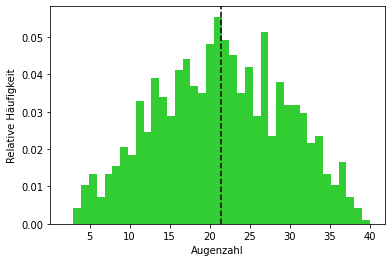

Arithmetisches Mittel:  21.352 
Empirische Standardabweichung:  8.202932158685698


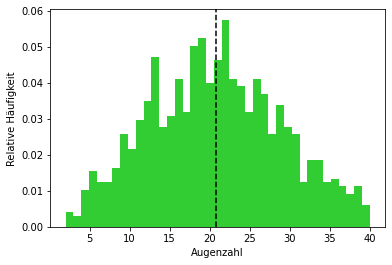

Arithmetisches Mittel:  20.736 
Empirische Standardabweichung:  8.428422390934141


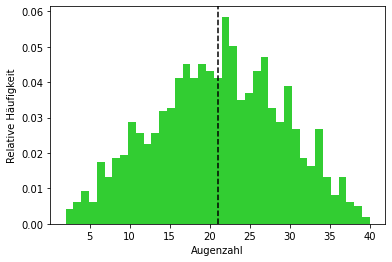

Arithmetisches Mittel:  21.082 
Empirische Standardabweichung:  8.209706206679993


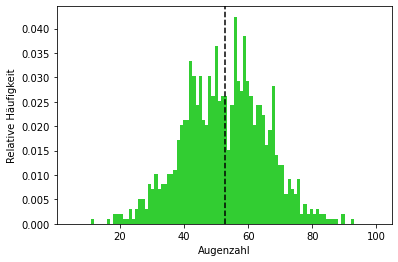

Arithmetisches Mittel:  52.808 
Empirische Standardabweichung:  12.915925673369292


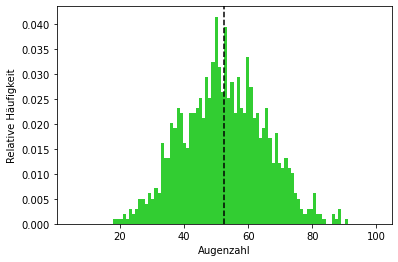

Arithmetisches Mittel:  52.486 
Empirische Standardabweichung:  12.922376097297278


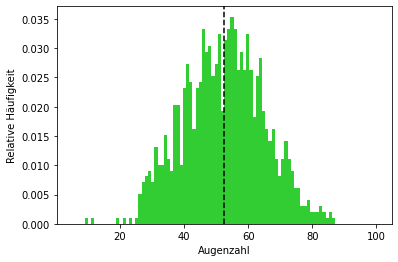

Arithmetisches Mittel:  52.328 
Empirische Standardabweichung:  12.657583339642681


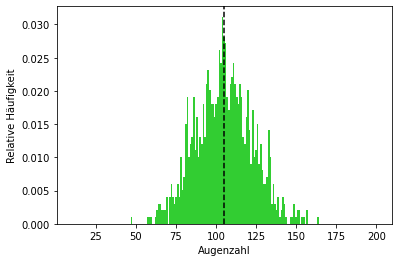

Arithmetisches Mittel:  105.033 
Empirische Standardabweichung:  17.85989672422548


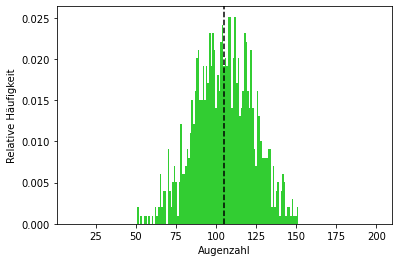

Arithmetisches Mittel:  104.908 
Empirische Standardabweichung:  18.300533762707577


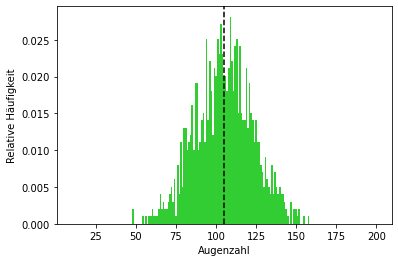

Arithmetisches Mittel:  104.941 
Empirische Standardabweichung:  18.190973558333816


In [92]:
#Aufgabe 1d)
"""
Simulieren Sie mit Hilfe der Funktion dice(n=1000, m, k=20, save = "example") ein Zufallsexperiment. 
Dabei sollen i) zwei, ii) f√ºnf und iii) zehn 20-seitige W√ºrfel je 1000 mal geworfen werden.
Vergleichen Sie jeweils den Mittelwert und die empirische Standardabweichung mit dem Erwartungswert und der Standardabweichung aus Teil a). 
"""
dice4_1 = dice(n=1000, m=2, k=20) #Erstes Ergebnis f√ºr 2 W√ºrfel
dice4_2 = dice(n=1000, m=2, k=20) #Zweites Ergebnis f√ºr 2 W√ºrfel
dice4_3 = dice(n=1000, m=2, k=20) #Drittes Ergebnis f√ºr 2 W√ºrfel
dice4 = [dice4_1, dice4_2, dice4_3]

dice5_1 = dice(n=1000, m=5, k=20) #Erstes Ergebnis f√ºr 5 W√ºrfel
dice5_2 = dice(n=1000, m=5, k=20) #Zweites Ergebnis f√ºr 5 W√ºrfel
dice5_3 = dice(n=1000, m=5, k=20) #Drittes Ergebnis f√ºr 5 W√ºrfel
dice5 = [dice5_1, dice5_2, dice5_3]

dice6_1 = dice(n=1000, m=10, k=20) #Erstes Ergebnis f√ºr 10 W√ºrfel
dice6_2 = dice(n=1000, m=10, k=20) #Zweites Ergebnis f√ºr 10 W√ºrfel
dice6_3 = dice(n=1000, m=10, k=20) #Drittes Ergebnis f√ºr 10 W√ºrfel
dice6 = [dice6_1, dice6_2, dice6_3]

In [80]:
#Auswertung Mittelwert f√ºr 2 W√ºrfel
dices = dice4
¬µ = (dices[0][1] + dices[1][1] + dices[2][1])/3
theoretischer_erwartungswert = 21
abweichung = abs(theoretischer_erwartungswert-¬µ)
nachkomma_genauigkeit = abs(int(math.log10(abs(¬µ)))) if 1-abweichung > 0.9 else 'keine'
approximation = ['m√§√üig gute', 'gute', 'sehr gute'][abs(int(math.log10(abs(¬µ)))) if 1-abweichung > 0.9 else 0]

print(f'Die drei experimentellen Werte f√ºr das arithmetische Mittel bei {2} W√ºrfeln '
      f'eines 20 seitigen W√ºrfels sind: {", ".join([str(i[1]) for i in dices])}')
print(f'Der Mittelwert der experimentelen Ergebnisse {¬µ=:.4f} ist eine {approximation} Aproximation des berechneten Werts von {theoretischer_erwartungswert}. '
      f'Der experimentele Wert ist auf {nachkomma_genauigkeit} Nachkommastellen genau mit einer Abweichung von {abweichung:.4f}')

Die drei experimentellen Werte f√ºr das arithmetische Mittel bei 2 W√ºrfeln eines 20 seitigen W√ºrfels sind: 21.065, 21.08, 20.432
Der Mittelwert der experimentelen Ergebnisse ¬µ=20.8590 ist eine m√§√üig gute Aproximation des berechneten Werts von 21. Der experimentele Wert ist auf keine Nachkommastellen genau mit einer Abweichung von 0.1410


In [81]:
#Auswertung Mittelwert f√ºr 5 W√ºrfel
dices = dice5
¬µ = (dices[0][1] + dices[1][1] + dices[2][1])/3
theoretischer_erwartungswert = 52.5
abweichung = abs(theoretischer_erwartungswert-¬µ)
nachkomma_genauigkeit = abs(int(math.log10(abs(¬µ)))) if 1-abweichung > 0.9 else 'keine'
approximation = ['m√§√üig gute', 'gute', 'sehr gute'][abs(int(math.log10(abs(¬µ)))) if 1-abweichung > 0.9 else 0]

print(f'Die drei experimentellen Werte f√ºr das arithmetische Mittel bei {5} W√ºrfeln '
      f'eines 20 seitigen W√ºrfels sind: {", ".join([str(i[1]) for i in dices])}')
print(f'Der Mittelwert der experimentelen Ergebnisse {¬µ=:.4f} ist eine {approximation} Aproximation des berechneten Werts von {theoretischer_erwartungswert}. '
      f'Der experimentele Wert ist auf {nachkomma_genauigkeit} Nachkommastellen genau mit einer Abweichung von {abweichung:.4f}')

Die drei experimentellen Werte f√ºr das arithmetische Mittel bei 5 W√ºrfeln eines 20 seitigen W√ºrfels sind: 51.535, 51.824, 52.618
Der Mittelwert der experimentelen Ergebnisse ¬µ=51.9923 ist eine m√§√üig gute Aproximation des berechneten Werts von 52.5. Der experimentele Wert ist auf keine Nachkommastellen genau mit einer Abweichung von 0.5077


In [82]:
#Auswertung Mittelwert f√ºr 10 W√ºrfel
dices = dice6
¬µ = (dices[0][1] + dices[1][1] + dices[2][1])/3
theoretischer_erwartungswert = 105
abweichung = abs(theoretischer_erwartungswert-¬µ)
nachkomma_genauigkeit = abs(int(math.log10(abs(¬µ)))) if 1-abweichung > 0.9 else 'keine'
approximation = ['m√§√üig gute', 'gute', 'sehr gute'][abs(int(math.log10(abs(¬µ)))) if 1-abweichung > 0.9 else 0]

print(f'Die drei experimentellen Werte f√ºr das arithmetische Mittel bei {10} W√ºrfeln '
      f'eines 20 seitigen W√ºrfels sind: {", ".join([str(i[1]) for i in dices])}')
print(f'Der Mittelwert der experimentelen Ergebnisse {¬µ=:.4f} ist eine {approximation} Aproximation des berechneten Werts von {theoretischer_erwartungswert}. '
      f'Der experimentele Wert ist auf {nachkomma_genauigkeit} Nachkommastellen genau mit einer Abweichung von {abweichung:.4f}')

Die drei experimentellen Werte f√ºr das arithmetische Mittel bei 10 W√ºrfeln eines 20 seitigen W√ºrfels sind: 105.252, 104.721, 103.938
Der Mittelwert der experimentelen Ergebnisse ¬µ=104.6370 ist eine m√§√üig gute Aproximation des berechneten Werts von 105. Der experimentele Wert ist auf keine Nachkommastellen genau mit einer Abweichung von 0.3630


In [83]:
#Auswertung Standardabweichung f√ºr 2 W√ºrfel
# Standardabweichung œÉ = math.sqrt(2 * 133/4)

In [84]:
#Auswertung Standardabweichung f√ºr 5 W√ºrfel 
œÉ = math.sqrt(5*133/4)

In [85]:
#Auswertung Standardabweichung f√ºr 10 W√ºrfel 
œÉ = math.sqrt(10*133/4)

In [86]:
#Aufgabe 1e) 

"""
Interpretieren Sie Ihre Ergebnisse. Entsprechen Sie Ihren Erwartungen? 

Ja, die Werte entsprachen unseren Erwartungen. Die theoretisch berechneten Werte unterscheiden sich bei den hier durch gerecheneten Beispielversuchen erst
in der ersten Nachkommastelle. Folglich sind wohl Theorie und experimentelle Umsetzung korrekt durchgef√ºhrt worden, da sich die Ergebnise, bis auf ebenjene Abweichungen, gleichen.

Die Ergebnisse der durchgef√ºhrten Versuche wurden wiedererwartens nicht konstant mit steigender Durchf√ºhrungszahl immer genauer.
Die Abweichungen beim wiederholten Werfen des 20-seitigen W√ºrfels waren bei manchen Durchf√ºhrungen f√ºr 100 W√ºrfe kleiner als f√ºr manche der Durchf√ºhrungen mit 1000 oder sogar 10000 W√ºrfen!
Ebenso gibt es bei den berechneten Standardabweichungen Ausrei√üer.
Trotzdem l√§sst sich aus den Experimenten der Trend ableiten, das f√ºr mehr Durchf√ºhrungen des Experiments die Ergebnisse immer genauer werden. Ganz nach dem Gesetz der gro√üen Zahlen.
Um also aus Experimenten Gesetzm√§√üigkeiten herzuleiten oder theoretische Berechnungen zu best√§tigen,
ist es also unbedingt von Vorteil m√∂glichst viele Experimente durchzuf√ºhren um einen m√∂glichst genauen Mittelwert zum vergleichen zu bestimmen.
"""

'\nInterpretieren Sie Ihre Ergebnisse. Entsprechen Sie Ihren Erwartungen? \n\nJa, die Werte entsprachen meinen Erwartungen. Die theoretisch berechneten Werte unterscheiden sich bei den hier durch gerecheneten Beispielversuchen erst\nin der ersten Nachkommastelle. Folglich sind wohl Theorie und experimentelle Umsetzung korrekt durchgef√ºhrt worden, da sich die Ergebnise, bis auf ebenjene Abweichungen, gleichen.\n\nDie Ergebnisse der durchgef√ºhrten Versuche wurden wiedererwartens nicht konstant mit steigender Durchf√ºhrungszahl immer genauer.\nDie Abweichungen beim wiederholten Werfen des 20-seitigen W√ºrfels waren 0.04, 0.106 und 0.0459. Hier ist sogar das erste Ergebnis bei dem nur 100 mal geworfen wurde\nn√§her am theoretischen Wert als beide Versuche mit 10 und 100 mal so vielen W√ºrfen.\nEbenso gibt es bei den berechneten Standardabweichungen einen Ausrei√üer da der Wert f√ºr 3 Versuche mit 1000 gr√∂√üer ist, als f√ºr 100\nDie Standardabweichungen bei den wiederholten Versuchen war

In [ ]:
#Aufgabe 1f)
"""
F√ºhren Sie mit den Werten aus d) mit Hilfe der Funktion chi_search(x = points, sigma, mu, save = "example") einen Fit durch.
Dabei wird eine Gau√üfunktion als theoretische Funktion verwendet. Vergleichen sie die ùúí2 Werte.
Welcher Wert ist besonders hoch/gering und woran k√∂nnte das liegen? 

chi_squared(dice4[1], sigma = ?, mu = ?)
chi_squared(dice5[1], sigma = ?, mu = ?)
chi_squared(dice6[1], sigma = ?, mu = ?)

Steht im Skript erkl√§rt. 3.1.5 in der Aufgabenstellung"""

print('Theoretisch')
chi_squared(dice4[1], sigma = math.sqrt(266/4), mu=21)

chi_squared(dice4[0], sigma =100, mu= dice4[0][1])
print('Experimentell 1 1')
chi_squared(dice4[0], sigma = dice4[0][2], mu= dice4[0][1])
print('Experimentell 1 2')
chi_squared(dice4[1], sigma = dice4[1][2], mu= dice4[1][1])
print('Experimentell 1 3')
chi_squared(dice4[2], sigma = dice4[2][2], mu= dice4[2][1])
mittelwert4 = (dice4[0][1]+dice4[1][1]+dice4[2][1])/3
standard4 = (dice4[0][2]+dice4[1][2]+dice4[2][2])/3
print('Durchschnitt experimentell')
chi_squared(dice4[1], sigma = standard4, mu=mittelwert4)

print('Experimentell 2 1')
chi_squared(dice5[0], sigma = dice5[0][2], mu= dice5[0][1])
print('Experimentell 2 2')
chi_squared(dice5[1], sigma = dice5[1][2], mu= dice5[1][1])
print('Experimentell 2 3')
chi_squared(dice5[2], sigma = dice5[2][2], mu= dice5[2][1])

print('Experimentell 3 1')
chi_squared(dice6[0], sigma = dice6[0][2], mu= dice6[0][1])
print('Experimentell 3 2')
chi_squared(dice6[1], sigma = dice6[1][2], mu= dice6[1][1])
print('Experimentell 3 3')
chi_squared(dice6[2], sigma = dice6[2][2], mu= dice6[2][1])

#counter = 0
#for i in range(1, 10):
#    print(chi_squared_without_plot(dice4[1], sigma =(math.sqrt(266/4)), mu=(21-counter)))
#    counter += 0.0001

"""
Diese sind f√ºr die Gau√üfunktion, die nur von œÉ und ¬µ der Datenmenge abh√§ngt.

Der beste Fit an experimentelle Datenwerte, also das kleinste œá2 erh√§lt man, wenn man die aus dem Datensatz errechnete Standardabweichung und Mittelwert einsetzt.
Das ist besser als der theoretische Wert oder der Durchschnitt der experimentellen Standardabweichungen und Mittelwerte.
Bei endlichen statistischen Versuchen entspricht das Ergebnis einer Messreihe nie exakt dem theoretischen Wert. Den besten Fit erh√§lt man dann nat√ºrlich durch die
aus ihm selbst berechneten Werte.
F√ºr mehr W√ºrfel wird das œá2 gr√∂√üer, da bei gleichbleibender Anzahl an W√ºrfen mehr Bins getroffen werden k√∂nnen. Die m√∂gliche Abweichung pro Bin also gr√∂√üer wird.
Die experimentelle Datenmenge ist weiter von der theroetische Gau√üverteilung entfernt und kann deswegen auch nicht so gut mit einer Gau√üfunktion approximiert werden.
Deutlich hier weil œá2 f√ºr 2 W√ºrfel kleiner ist als f√ºr 5 und f√ºr 5 W√ºrfel kleiner als f√ºr 10.
Mit mehr W√ºrfen, also mehr Durchf√ºhrungen des Versuchs, w√ºrde sich das œá2 auch hier, bei mehr W√ºrfeln, wieder kleiner werden.
"""

# Aufgabe 1g)
## i) Wie hoch ist die Wahrscheinlichkeit, dass beim 10-maligen Werfen eines 20-seitigen W√ºrfels mindestens einmal die 20 f√§llt?
Wir betrachten die Wahrscheinlichkeit das die 20 √ºberhaupt nicht f√§llt.
In jedem Wurf bleiben von den 20 M√∂glichkeiten noch 19 √ºbrig. <br>
q ist damit = (1 - p)**10 = (19/20)**10<br>
Die gesuchte Wahrscheinlichkeit ist dann p = 1 - q = 1 - (19/20)**10 ‚âà 0.401 

## ii) Wie hoch ist die Wahrscheinlichkeit, dass beim 10-maligen Werfen eines 20-seitigen W√ºrfels h√∂chstens 2 mal die 1 f√§llt?
Die Wahrscheinlichkeit auf eine 1 ist p = 1/20 <br>
Wir betrachten nun die Wahrscheinlichkeiten das die Eins 0 mal, 1 mal oder 2 mal gew√ºrfelt wird. <br>
Die Wahrscheinlichkeit das bei n W√ºrfen die Zahl, mit Wahrscheinlichkeit p, genau k-mal vorkommt ist: <br>
$p(x=k) = n!/(k! * (n-k)!) * p**k * (1-p)**(n-k)$

Die Wahrscheinlichkeit das die gar nicht 1 f√§llt ist $(19/20)**10 ‚âà 0.599$ <br>
$p(k=0) = math.factorial(10)/(math.factorial(0) * math.factorial(10-0)) * (1/20)**0 * (1-1/20)**(10-0) ‚âà 0.599$ <br>
$p(k=1) = math.factorial(10)/(math.factorial(1) * math.factorial(10-1)) * (1/20)**1 * (1-1/20)**(10-1) ‚âà 0.315$ <br>
$p(k=2) = math.factorial(10)/(math.factorial(2) * math.factorial(10-2)) * (1/20)**2 * (1-1/20)**(10-2) ‚âà 0.075$ <br>

Die gesuchte Wahrscheinlichkeit ist damit $P = p(k=0) + p(k=1) + p(k=2) ‚âà 0.988496$

## iii) Wie hoch ist die Wahrscheinlichkeit, dass beim 10-maligen Werfen eines 20-seitigen W√ºrfels genau 3 mal die 5 f√§llt?
Die Wahrscheinlichkeit das genau 3 mal die 5 f√§llt l√§sst sich mit der Formel aus Aufgabenteil ii) berechnen <br>
$p(k=3) = math.factorial(10)/(math.factorial(3) * math.factorial(10-3)) * (1/20)**3 * (1-1/20)**(10-3) ‚âà 0.0105$

## iv) Wie hoch ist die Wahrscheinlichkeit, dass beim 10-maligen Werfen eines 20-seitigen W√ºrfels genau 3 mal die 5 UND h√∂chstens 2 mal die 1
Die beiden Ereignisse ii) und iii) sind stochastisch unabh√§ngig dann <br>
p(ii) * p(iii) = <br>
    math.factorial(10)/(math.factorial(3) * math.factorial(10-3)) * (1/20)**3 * (1-1/20)**(10-3) * ( <br>
        math.factorial(10)/(math.factorial(0) * math.factorial(10-0)) * (1/20)**0 * (1-1/20)**(10-0) + <br>
        math.factorial(10)/(math.factorial(1) * math.factorial(10-1)) * (1/20)**1 * (1-1/20)**(10-1) + <br>
        math.factorial(10)/(math.factorial(2) * math.factorial(10-2)) * (1/20)**2 * (1-1/20)**(10-2)) <br>
‚âà 0.01038

Die beiden Ereignisse ii) und iii) sind stochastisch abh√§ngig: <br>
Damit das Ereignis eintritt m√ºssen 3 W√ºrfel eine 5 zeigen. Die √ºbrigen 7 W√ºrfel k√∂nnen nun 0, 1 oder 2 Einsen zeigen. <br>
Also p(iii) * (p(k=0) + p(k=1) + p(k=2)) <br>
math.factorial(10)/(math.factorial(3) * math.factorial(10-3)) * (1/20)**3 * (1-1/20)**(10-3) * ( <br>
    math.factorial(7)/(math.factorial(0) * math.factorial(7-0)) * (1/20)**0 * (1-1/20)**(7-0) + <br>
    math.factorial(7)/(math.factorial(1) * math.factorial(7-1)) * (1/20)**1 * (1-1/20)**(7-1) + <br>
    math.factorial(7)/(math.factorial(2) * math.factorial(7-2)) * (1/20)**2 * (1-1/20)**(7-2)) <br>
‚âà 0.01043570419298467